In [1]:
#Install and imports
!pip install torch torchvision trdg
!pip install Pillow==9.5.0
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


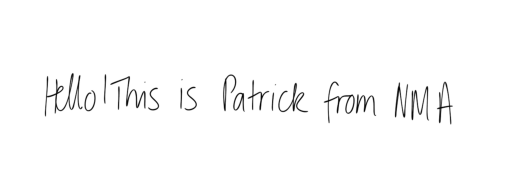

In [2]:
# Path to the image
image_path = '../static/image_augmentation.png'

# Open the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


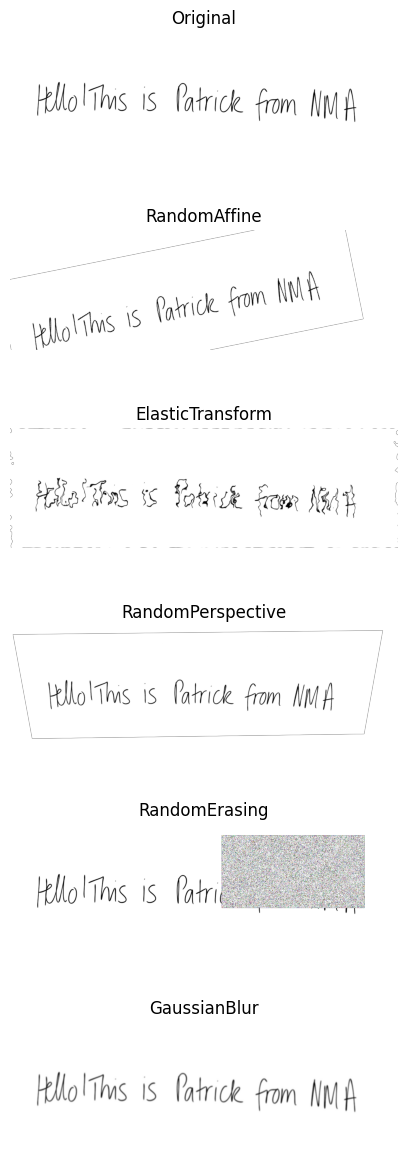

In [3]:
# Convert PIL Image to Tensor
to_tensor = transforms.ToTensor()
image = to_tensor(image)

# Define each transformation separately
# RandomAffine: applies rotations, translations, scaling. Here, rotates by up to ±15 degrees,
affine = transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1))

# ElasticTransform: applies elastic distortions to the image. The 'alpha' parameter controls
# the intensity of the distortion.
elastic = transforms.ElasticTransform(alpha=90.0)

# RandomPerspective: applies random perspective transformations with a specified distortion scale.
perspective = transforms.RandomPerspective(distortion_scale=0.2, p=1.0)

# RandomErasing: randomly erases a rectangle area in the image.
erasing = transforms.RandomErasing(p=1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random', inplace=False)

# GaussianBlur: applies gaussian blur with specified kernel size and sigma range. 
gaussian_blur = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))

# A list of all transformations for iteration
transformations = [affine, elastic, perspective, erasing, gaussian_blur]

# Vertical stacking of transformations
fig, axs = plt.subplots(len(transformations) + 1, 1, figsize=(5, 15))  # Adjusted for vertical stacking


# If image has 4 channels or a batch dimension, adjust as necessary
if image.shape[0] == 4 or len(image.shape) == 4:
    display_image = image.permute(1, 2, 0)  # Change to (H, W, C)
else:
    display_image = image

axs[0].imshow(display_image)
axs[0].set_title('Original')
axs[0].axis('off')

for i, transform in enumerate(transformations, 1):
    augmented_image = transforms.Compose([transform])(image)
    # If augmented_image has 4 channels or a batch dimension, adjust as necessary
    if augmented_image.shape[0] == 4 or len(augmented_image.shape) == 4:
        display_augmented = augmented_image.permute(1, 2, 0)  # Change to (H, W, C)
    else:
        display_augmented = augmented_image
    axs[i].imshow(display_augmented)
    axs[i].set_title(transform.__class__.__name__)
    axs[i].axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


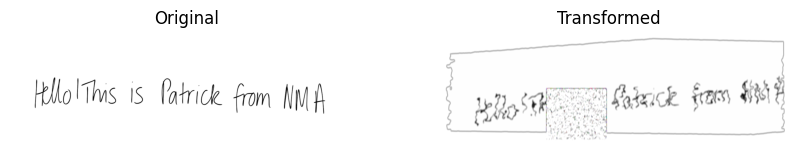

In [4]:
# Path to the image
image_path = '../static/image_augmentation.png'

# Open the image
image = Image.open(image_path)

# Convert PIL Image to Tensor
to_tensor = transforms.ToTensor()
image_tensor = to_tensor(image)

# Define your transformations here
affine = transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1))
elastic = transforms.ElasticTransform(alpha=90.0)
perspective = transforms.RandomPerspective(distortion_scale=0.2, p=1.0)
erasing = transforms.RandomErasing(p=1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random', inplace=False)
gaussian_blur = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))

# Combine all the transformations
all_transforms = transforms.Compose([
    affine,
    elastic,
    perspective,
    erasing,
    gaussian_blur
])

# Apply combined transformation
augmented_image_tensor = all_transforms(image_tensor)

# Set up matplotlib subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display original image
axs[0].imshow(image_tensor.permute(1, 2, 0))  # Change to (H, W, C) for display
axs[0].set_title('Original')
axs[0].axis('off')

# Display augmented image
axs[1].imshow(augmented_image_tensor.permute(1, 2, 0))  # Change to (H, W, C) for display
axs[1].set_title('Transformed')
axs[1].axis('off')

plt.show()


In [7]:
from trdg.generators import GeneratorFromStrings
import matplotlib.pyplot as plt
import os

# Specify a valid directory with background images or use a simple background
valid_image_dir = "path/to/your/image/directory"  # Replace with your directory path
if not os.path.exists(valid_image_dir):
    valid_image_dir = None  # Use simple background if path doesn't exist

# Define generators with the specified image directory or without complex backgrounds
generators = [
    GeneratorFromStrings(['Hello!'], blur=1, fonts=[humor_sans_font_path], image_dir=valid_image_dir),  # blur
    GeneratorFromStrings(['This is Patrick'], skewing_angle=8, fonts=[humor_sans_font_path], image_dir=valid_image_dir),  # skew
    GeneratorFromStrings(['From NMA'], space_width=5, fonts=[humor_sans_font_path], image_dir=valid_image_dir),  # space width
]

# Setup matplotlib figure and display images
plt.figure(figsize=(15, 3))
for i, gen in enumerate(generators, 1):
    img, lbl = next(gen)
    ax = plt.subplot(1, 6, i)
    plt.imshow(img)
    plt.title(f"Example {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

OSError: cannot open resource

<Figure size 1500x300 with 0 Axes>

In [ ]:
from trdg.generators import GeneratorFromStrings
import matplotlib.pyplot as plt
import os

# Specify a valid directory with background images or use a simple background
valid_image_dir = "path/to/your/image/directory"  # Replace with your directory path
if not os.path.exists(valid_image_dir):
    valid_image_dir = None  # Use simple background if path doesn't exist

generators = [
    GeneratorFromStrings(['Hello!'], blur=1, skewing_angle=8, space_width=5, image_dir=valid_image_dir), #blur
    GeneratorFromStrings(['This is Patrick'], blur=1, skewing_angle=8, space_width=5, image_dir=valid_image_dir), #blur
    GeneratorFromStrings(['From NMA'], blur=1, skewing_angle=8, space_width=5, image_dir=valid_image_dir), #blur

]
# Setup matplotlib figure and display images
plt.figure(figsize=(15, 3))
for i, gen in enumerate(generators, 1):
    img, lbl = next(gen)
    ax = plt.subplot(1, 2, i)
    plt.imshow(img)
    plt.title(f"Example {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from IPython.display import IFrame

IFrame("https://www.calligrapher.ai/", width=800, height=600)